# <span style="color:green"> ESERCITAZIONE 4 </span>

### <span style="color:blue">  Esercizio 04.1 </span>

<span style="color:blue"> Includi il calcolo della pressione $P$ nel codice di Dinamica Molecolare. Fare il data blocking, calcolare i valori della media progressiva e le rispettive incertezze. </span>

L'obiettivo di questo esperimento è studiare l'evoluzione temporale di un sistema di materia in uno stato macroscopico: solido, liquido e gassoso. La materia, quando si trova in uno di questi stati, è all'equilibrio e non cambia nel tempo, a meno che non subisca perturbazioni dall'esterno. 

Per calcolare le proprietà della materia all'equilibrio, si dovrebbe risolvere analiticamente un integrale di una funzione che ha come variabili $3N$ coordinate delle posizioni e $3N$ coordinate dei momenti, essendo $N$ il numero di particelle. Dopodiché se ne dovrebbe calcolare la media temporale. Il calcolo andrebbe ripetuto per ciascuna delle proprietà che si vuole misurare. Siccome questo sarebbe un duro compito, si utilizza un codice di Dinamica Molecolare. 

La Dinamica Molecolare è la disciplina del simulare il comportamento dipendente dal tempo di un sistema di particelle. Il calcolo dell'evoluzione temporale di questo sistema di particelle interagenti è conseguenza dell'integrazione delle loro equazioni del moto, essendo fissate delle opportune condizioni al contorno date la geometria e le simmetrie del sistema. 

Esistono diverse tecniche di integrazione numerica per le equazioni del moto. Il codice a noi donato utilizza l'algoritmo di Verlet. Affinché si conservi l'energia, deve valere l'invarianza per inversione temporale: $H(t)=H(-t)$. L'algoritmo di Verlet è il più semplice ed è efficiente dal punto di vista computazionale. 

Il codice a noi donato calcola già le seguenti proprietà del sistema: energia totale (interna) per particella $E/N$, energia potenziale per particella $U/N$, energia cinetica per particella $K/N$ e temperatura $T$. Noi abbiamo inserito il calcolo della pressione $P$, tenendo conto del teorema del **viriale** in un sistema di **Lennard-Jones**. $\left\langle W \right\rangle$ è il valore di aspettazione del viriale dato dall'interazione tra le particelle in un potenziale di Lennard-Jones.

Nel codice è stato modificato il vettore **walker**: ora è costituto da cinque elementi che corrispondono alle quantità richieste dal problema. Nel codice sono state inserite sia la formula per il calcolo della **pressione**, sia le istruzioni per svolgere il processo della **media a blocchi** per questa grandezza fisica. 

### <span style="color:blue">  Esercizio 04.2 </span>

<span style="color:blue"> Fare una simulazione di Dinamica Molecolare, con un modello alla Lennard-Jones per l'Argon, per le tre fasi della materia: solida, liquida e gassosa. </span>

Una volta aggiornato il codice in modo da poter calcolare anche la pressione, viene eseguita una simulazione di Dinamica Molecolare per l'Argon. La simulazione deve essere eseguita per le tre fasi della materia: solida, liquida e gassosa. I dati di input variano per i tre casi e si trovano in tre diversi file di input. Il codice viene eseguito tre volte, ogni volta con un file di input diverso. La configurazione iniziale del sistema è un cristallo.

### Unità di misura

Nel testo del problema vengono indicati dei valori specifici per l'Argon per le quantità: $\sigma$, $\epsilon$ ed $m$. Il codice esegue le simulazioni nelle unità di misura **naturali** del problema: in questo caso sono i parametri del potenziale di Lennard-Jones: $\sigma$ ed $\epsilon$. Questo vuol dire che, per lo svolgimento dei calcoli, i parametri sono posti a: $\sigma=1$, $\epsilon=1$ e $k_{B}=1$. La massa non partecipa ai calcoli ma caratterizza l'elemento. Nel caso in cui si volesse risolvere il problema nelle unità del Sistema Internazionale, allora si sostitiuscono i valori indicati nel testo del problema e il vero valore della costante di Boltzmann: $k_{B}=1.38\times 10^{-23} J/K$.

### Temperatura iniziale

Iniziamo con l'eseguire il codice per la fase liquida. Il testo dell'esercizio propone come temperatura iniziale $T=1.1$, ma dopo aver eseguito il codice otteniamo una sorpresa: **la temperatura del sistema è crollata** a $T=0.6$. Ci chiediamo: come mai questo accade? 

La risposta potrebbe essere che **il sistema**, che parte da una configurazione cristallina, nel passare alla fase liquida **si scioglie**, con una conseguente variazione dell'energia cinetica e della temperatura. Il sistema all'inizio è un **cristallo**, con le particelle poste in posizioni fisse nel reticolo. Dopodiché lo sottoponiamo ad una temperatura abbastanza alta affinché si sciolga. Il sistema si scioglie: **le particelle si spostano** dalla posizione iniziale e hanno un'energia cinetica che le fa muovere. In seguito agli spostamenti e alle collisioni, le particelle **perdono energia cinetica** e si stabilizzano gradualmente in nuovi punti del reticolo. Durante il processo diminuiscono sia l'energia cinetica, sia la temperatura, fino a che il sistema non **raggiunge l'equilibrio**. In questa nuova configurazione, le particelle hanno un'energia cinetica che consente loro solo di **oscillare** attorno alla posizione in cui si trovano, ma non si spostano più. Essendo minore questa energia, sarà anche **diminuita la temperatura** del sistema. Per questo osserviamo un crollo della temperatura iniziale.

Noi però vorremmo svolgere la simulazione per $T=1.1$ e non per $T=0.6$: che cosa possiamo fare? Possiamo **partire da una temperatura più alta** e fare sciogliere il sistema al primo ciclo di simulazione: a questo punto **il sistema si stabilizza** nella nuova configurazione di equilibrio. Dobbiamo trovare la **temperatura giusta**, tale per cui, partendo da questa, **dopo il primo ciclo** si sarà **ridotta** a $T=1.1$. Sono andata per tentativi: ho scelto dei valori che mi sembravano ragionevoli, ho fatto evolvere il sistema e ho osservato la nuova temperatura. Ho trovato che il valore giusto di partenza per la fase liquida è $T=2.0$. Il valore a cui crolla temperatura dopo il primo ciclo è $T=1.14$: accettabile, ma non va ancora bene. 

### Equilibrazione

Eseguendo la simulazione per la fase liquida, alla fine dei primi quattro cicli, si misurano i seguenti valori della temperatura: $T=1.14$, $T=1.13$, $T=1.12$, $T=1.11$. A partire dal quinto ciclo, la temperatura si assesta attorno al valore $T=1.10$. Osserviamo che la **temperatura diminuisce ulteriormente** e gradualmente, fino ad arrivare al valore desiderato. Il motivo di queste piccole variazioni è dovuto al processo di calcolo delle nuove posizioni con l'algoritmo di Verlet. Si parte da una certa configurazione ma per **giungere in un intorno opportuno** della configurazione desiderata, l'algoritmo deve fare tanti **piccoli passi**. Quando l'algoritmo capisce di essere arrivato nel punto giusto, si ferma in questo suo intorno e si muove solo qui dentro. Questo succede quando si misura la temperatura: decresce gradualmente e poco per volta, fino ad arrivare al valore desiderato. 

A partire dal quinto ciclo di simulazione, il valore della temperatura oscilla di poco attorno al valore $1.10$, che è quello richiesto dal problema. Per questo, **prima di svolgere la simulazione** vera e propria, chiediamo al codice di svolgere **l'equilibrazione** del sistema. Per fare questo viene modificato il codice a noi donato. Ho deciso che i cicli di equilibrazione sono **quattro**: il sistema si muove liberamente, fino a trovare il valore giusto a cui tendere.

### Valori della temperatura iniziale e numero di cicli di equilibrazione

Dobbiamo svolgere i due processi sopra indicati per tutti e tre gli stati della materia. Lo stato liquido è stato spiegato prima. Vediamo adesso gli altri due stati.

**Stato solido**. Viene indicata come temperatura iniziale $T=0.8$. Eseguendo la simulazione, la **temperatura crolla** a $T=0.4$. Come per lo stato liquido, si parte da una temperatura iniziale più alta. Dopo vari tentativi, si trova $T=1.55$ come temperatura iniziale tale per cui, dopo il primo ciclo, la temperatura si assesta a $T=0.8$. Per fare l'equilibrazione basta un ciclo di simulazione e la temperatura si stabilizza subito. Questo perché partiamo da una configurazione iniziale cristallina e noi stiamo descrivendo in questo caso lo stato solido, che ha struttura cristallina. A differenza dello stato liquido, in cui il sistema si scioglie per davvero e le particelle scorrono una sull'altra, qui le **particelle si spostano di poco** rispetto alla configurazione iniziale.

**Stato gassoso**. Viene indicata come temperatura iniziale $T=1.2$. Eseguendo la simulazione, si osserva a differenza degli altri due casi, che la **temperatura sale** a $T=1.4$. Questo perché il sistema per evaporare ha bisogno di un'energia cinetica maggiore e di conseguenza la temperatura deve aumentare. Allora si parte da una temperatura più bassa. Dopo vari tentativi si trova che $T=0.975$ è la temperatura tale per cui il sistema si assesta a $T=1.2$. Il numero di cicli di equilibrazione in questo caso è più alto: sono venti. Questo perché nello stato gassoso, le **particelle sono libere di muoversi** e hanno maggiore energia cinetica, quindi per trovare la configurazione ideale all'equilibrio, le particelle esplorano maggiormente lo spazio. 

Vengono riportati i valori di temperatura inziale, temperatura ideale, densità di particelle, numero di cicli di equilibrazione e raggio di cutoff per i tre casi.

1. **Solido**:  $T_{start}=1.55$,  $T_{ideal}=0.8$, $\rho=1.1$,  $n_{eq}=1$,  $r_{cut}=2.2$.
2. **Liquido**: $T_{start}=2.0$,   $T_{ideal}=1.1$, $\rho=0.8$,  $n_{eq}=4$,  $r_{cut}=2.5$.
3. **Gas**:     $T_{start}=0.975$, $T_{ideal}=1.2$, $\rho=0.05$, $n_{eq}=20$, $r_{cut}=5.0$.

### Approssimazione di cutoff

Tra i dati del problema è presente il **raggio di cutoff**. Facciamo l'approssimazione per cui ogni particella **interagisca solo con le sue vicine** e non con tutte le altre del sistema. Se immaginamo che ogni particella sia al centro di un cerchio, assumiamo che interagisca solo con le particelle contenute nel cerchio, il cui raggio è $r_{cut}$. In realtà dovremmo tenere conto dell'interazione anche con le particelle lontane: lo faremo nell'Esercitazione $7$.

### Modifica al codice per l'equilibrazione

Nel codice originale ho inserito una funzione **Equilibrazione** che consiste nel richiamare un certo numero di volte la funzione **Move**: questo numero corrisponde al numero di cicli di equilibrazione $n_{eq}$ che viene indicato nel file di input. Ho aggiunto quindi la nuova variabile $n_{eq}$ e viene presa dalla funzione Input. Avendo inserito la funzione Equilibrazione, il codice non sfrutta la funzione Restart, perché la simulazione inizia dalla **configurazione** che **si genera** subito **dopo** aver concluso **l'equilibrazione**, senza rieseguire il programma. Durante l'equilibrazione non viene effettuata misura alcuna delle proprietà fisiche del sistema. Una volta conclusa questa fase, la simulazione può ufficialmente avere inizio.

### Simulazione

La simulazione consiste nel misurare le seguenti proprietà fisiche del sistema: 
1. energia totale interna per particella $E/N$,
2. energia potenziale per particella $U/N$,
3. energia cinetica per particella $K/N$,
4. temperatura del sistema $T$,
5. pressione del sistema $P$.

Le funzioni per svolgere i punti $1,2,3,4$ erano già implementate nel codice originale, mentre scrivere la funzione per svolgere il punto $5$ era l'obiettivo dell'esercizio precedente. Il calcolo delle quantità fisiche viene svolto $20$ volte e le medie vengono calcolate usando il metodo della **media a blocchi**. I blocchi in totale sono $20$, ciascuno costituito da $2000$ elementi estratti con il generatore di numeri casuali. Svolto il calcolo per un blocco si calcola la media, poi si aggiunge un altro blocco e si fa la media su due blocchi e si calcola la relativa incertezza, poi si fa con tre blocchi, fino ad arrivare a $20$ blocchi. Nei grafici viene mostrata la media progressiva con relativa incertezza aggiungendo ogni volta un blocco, da $1$ a $20$ blocchi. 

La simulazione viene svolta per tutte le $5$ proprietà fisiche, per i $3$ stati della materia. Il codice viene eseguito $3$ volte, per ogni stato della materia, variando ogni volta il file con i dati di input. Il codice ha prodotto in tutto $15$ file di output che hanno la seguente struttura: 

**1. numero di blocchi coinvolti nella media, 2. valore teorico calcolato, 3. valore sperimentale misurato, 4.incertezza.**

Di tutti i $15$ file sono stati realizzati i **grafici** che riportano a sinitra la curva sperimentale con le incertezze della media progressiva a blocchi e a destra la curva delle medie per ogni blocco. Le **curve** sono di colore **blu, verde e azzurro** rispettivamente per lo stato solido, liquido e gassoso. Di **arancione**, in tutti e tre i casi, sono colorati i punti misurati e una linea orizzontale che corrsponde al valore a cui converge la media a blocchi.

### Grafici

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### <span style="color:blue"> 1. Energia totale interna per particella: $E/N$. </span> 

### Stato solido

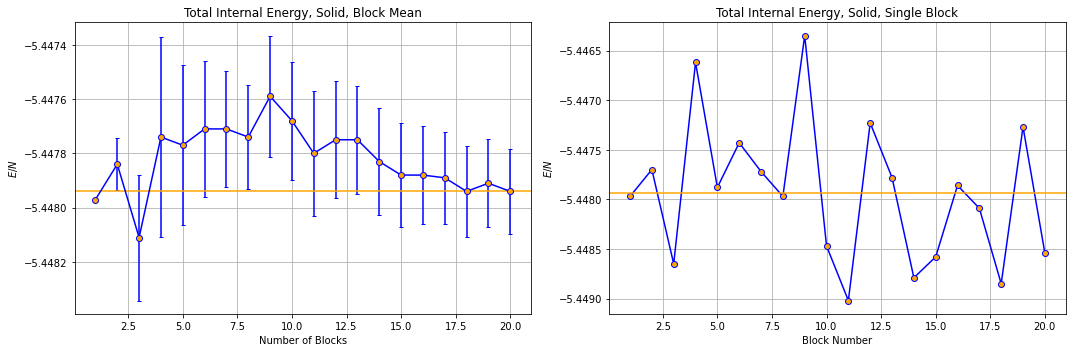

In [9]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("solid/output_etot.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, color='blue', capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=-5.44794, color='orange')

plt.title('Total Internal Energy, Solid, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$E/N$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, color='blue', marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=-5.44794, color='orange')

plt.title('Total Internal Energy, Solid, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$E/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Stato liquido

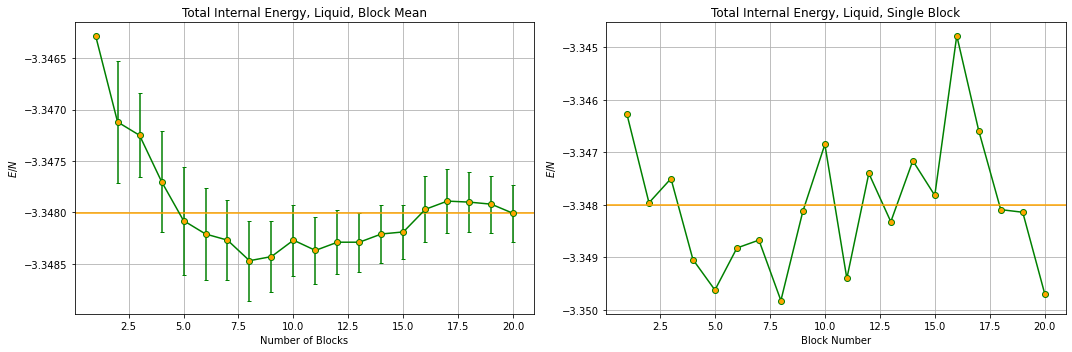

In [10]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("liquid/output_etot.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, color='green', capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=-3.34801, color='orange')

plt.title('Total Internal Energy, Liquid, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$E/N$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, color='green', marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=-3.34801, color='orange')

plt.title('Total Internal Energy, Liquid, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$E/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Stato gassoso

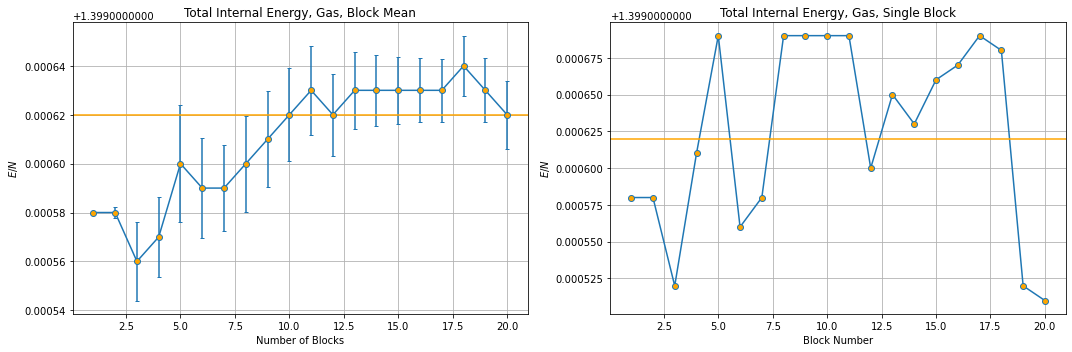

In [11]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("gas/output_etot.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=1.39962, color='orange')

plt.title('Total Internal Energy, Gas, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$E/N$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=1.39962, color='orange')

plt.title('Total Internal Energy, Gas, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$E/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Osservazioni

Per gli stati **solido e liquido** osserviamo che **l'energia totale interna è negativa** e lo è di più per lo stato solido. Questo indica il fatto che in questi due stati, le forze di interazione tra le particelle è **attrattiva**. Per lo stato **gassoso** invece l'energia totale interna è **positiva**, indice del fatto che le particelle di un gas si **respingono** e la loro natura è quella di occupare tutto lo spazio in cui si trovano. Nei grafici si osserva che la **convergenza** è buona: le barre di errore toccano per i tre quarti delle volte la linea del valore a cui la media a blocchi converge per gli stati solido e liquido e per i due terzi delle volte per lo stato gassoso.

### <span style="color:blue"> 2. Energia potenziale per particella: $U/N$. </span> 

### Stato solido

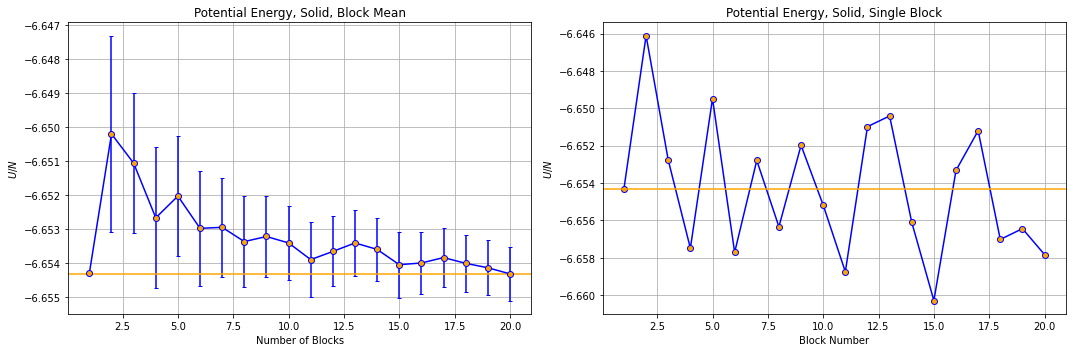

In [8]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("solid/output_epot.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, color='blue', capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=-6.65432, color='orange')

plt.title('Potential Energy, Solid, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$U/N$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, color='blue', marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=-6.65432, color='orange')

plt.title('Potential Energy, Solid, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$U/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Stato liquido

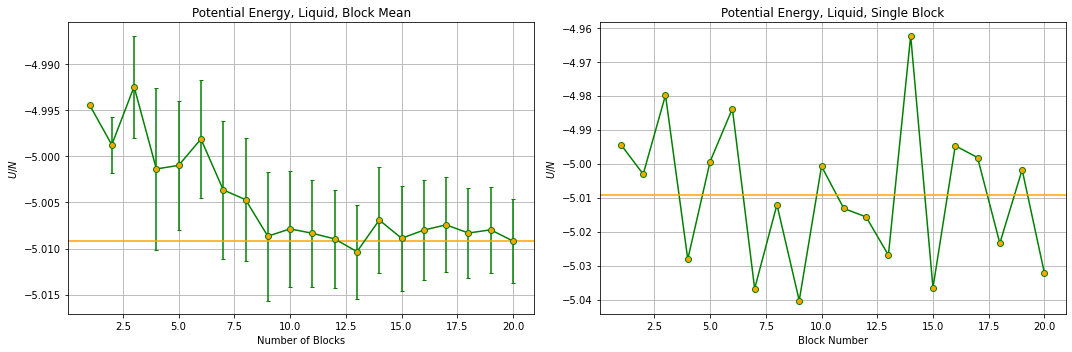

In [12]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("liquid/output_epot.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, color='green', capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=-5.00919, color='orange')

plt.title('Potential Energy, Liquid, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$U/N$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, color='green', marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=-5.00919, color='orange')

plt.title('Potential Energy, Liquid, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$U/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Stato gassoso

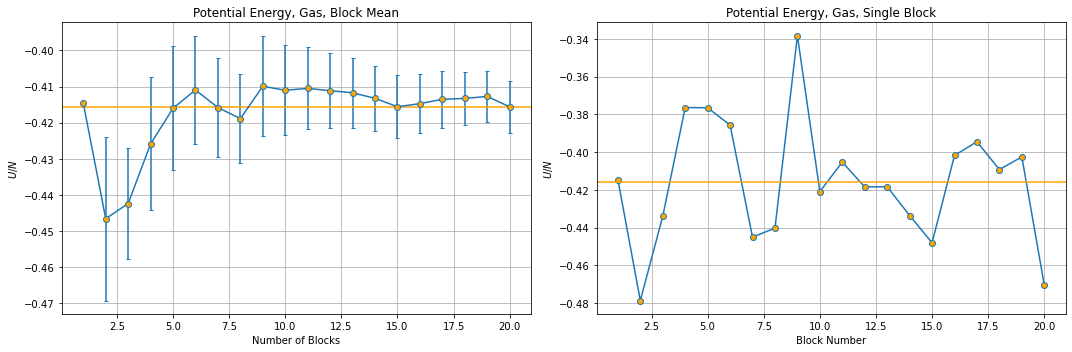

In [13]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("gas/output_epot.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=-0.415603, color='orange')

plt.title('Potential Energy, Gas, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$U/N$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=-0.415603, color='orange')

plt.title('Potential Energy, Gas, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$U/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Osservazioni

In tutti e tre i casi l'energia potenziale è **negativa**, perché rappresenta la propensione delle particelle a stare insieme. Per gli stati solido e liquido l'ordine di grandezza è lo stesso ed è maggiore in modulo per lo stato solido. L'energia potenziale per lo stato gassoso, rispetto agli altri due, è un ordine di grandezza più piccolo: è dieci volte più piccola e vicina allo zero, conferma del fatto che in un gas le particelle stanno meno ferme. La convergenza è buona: le barre di errore toccano per i tre quarti delle volte la linea del valore finale per gli stati soldo e liquido, mentre per lo stato gassoso questo avviene nove volte su dieci.

### <span style="color:blue"> 3. Energia cinetica per particella: $K/N$. </span> 

### Stato solido

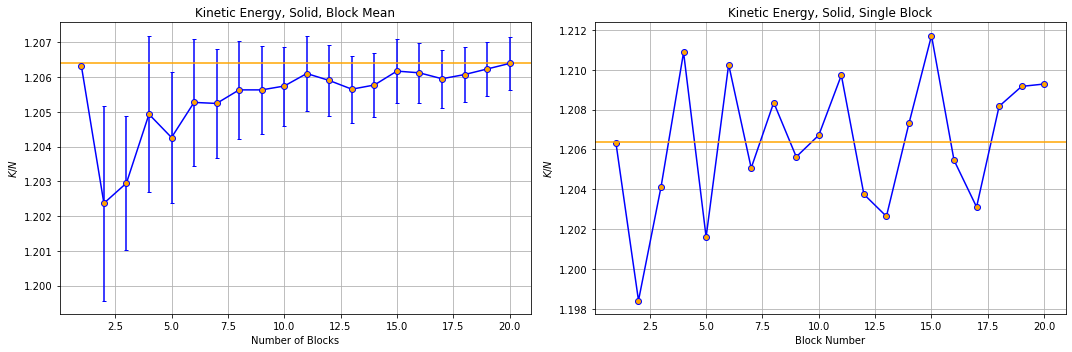

In [15]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("solid/output_ekin.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, color='blue', capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=1.20639, color='orange')

plt.title('Kinetic Energy, Solid, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$K/N$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, color='blue', marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=1.20639, color='orange')

plt.title('Kinetic Energy, Solid, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$K/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Stato liquido

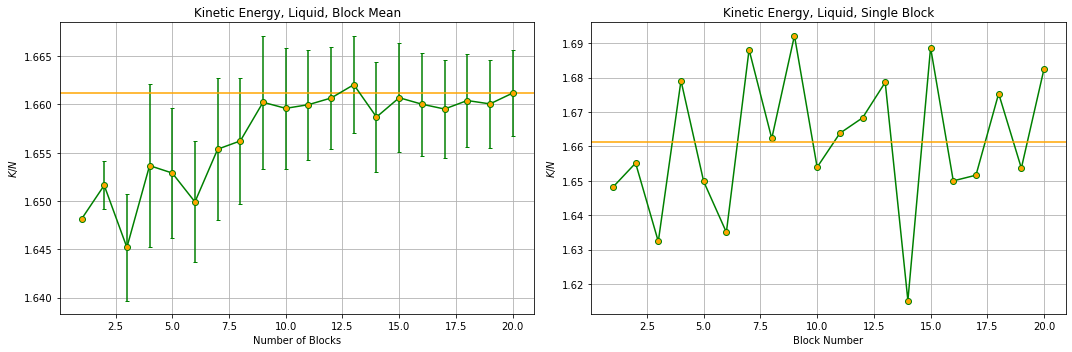

In [16]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("liquid/output_ekin.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, color='green', capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=1.66118, color='orange')

plt.title('Kinetic Energy, Liquid, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$K/N$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, color='green', marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=1.66118, color='orange')

plt.title('Kinetic Energy, Liquid, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$K/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Stato gassoso

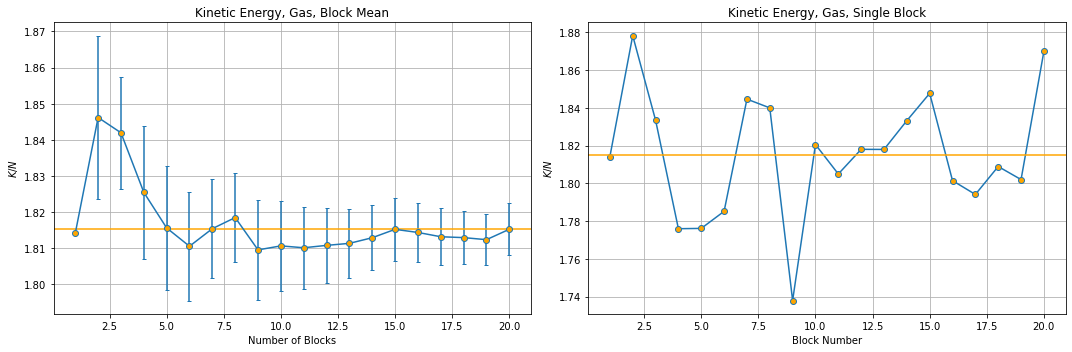

In [17]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("gas/output_ekin.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=1.81523, color='orange')

plt.title('Kinetic Energy, Gas, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$K/N$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=1.81523, color='orange')

plt.title('Kinetic Energy, Gas, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$K/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Osservazioni

In tutti e tre i casi l'energia cinetica è **positiva**, perché rappresenta la propensione delle particelle a muoversi. Per tutti gli stati l'ordine di grandezza è lo stesso. L'energia cinetica è maggiore per lo stato gassoso ed è minore per lo stato solido. Questo rappresenta il fatto che, nello stato solido le particelle tendono a stare ferme nella loro posizione nel cristallo, nello stato liquido scorrono una sull'altra, ossia nel muoversi sono vincolate l'una dalle altre e nello stato gassoso sono libere di muoversi in tutto lo spazio. La convergenza è buona: le barre di errore toccano per i tre quarti delle volte la linea del valore finale per gli stati soldo e liquido, mentre per lo stato gassoso questo avviene nove volte su dieci.

### <span style="color:blue"> 4. Temperatura: $T$. </span> 

### Stato solido

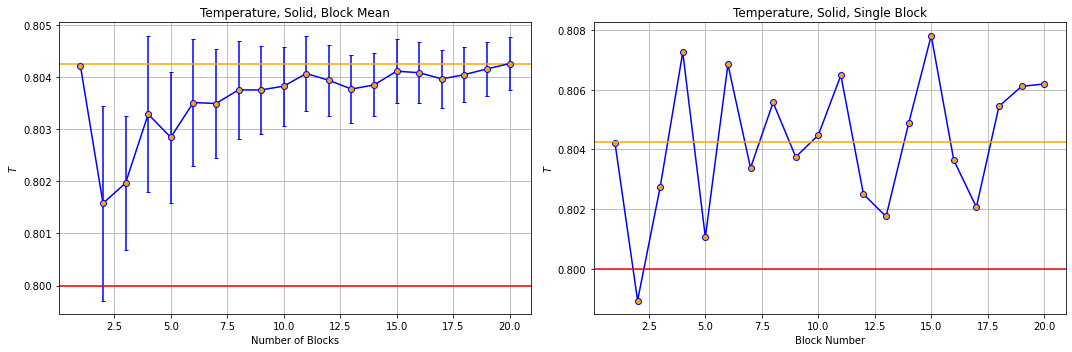

In [2]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("solid/output_temp.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, color='blue', capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=0.804257, color='orange')
plt.axhline(y=0.8, color='red')

plt.title('Temperature, Solid, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$T$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, color='blue', marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=0.804257, color='orange')
plt.axhline(y=0.8, color='red')

plt.title('Temperature, Solid, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$T$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Stato liquido

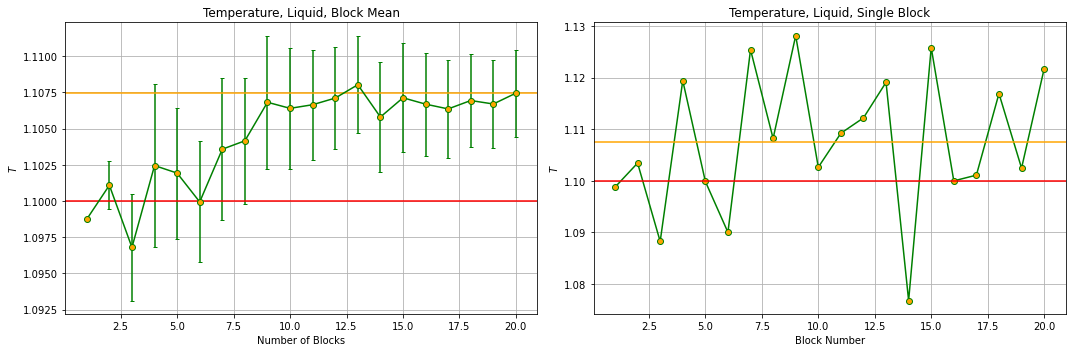

In [3]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("liquid/output_temp.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, color='green', capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=1.10745, color='orange')
plt.axhline(y=1.1, color='red')

plt.title('Temperature, Liquid, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$T$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, color='green', marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=1.10745, color='orange')
plt.axhline(y=1.1, color='red')

plt.title('Temperature, Liquid, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$T$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Stato gassoso

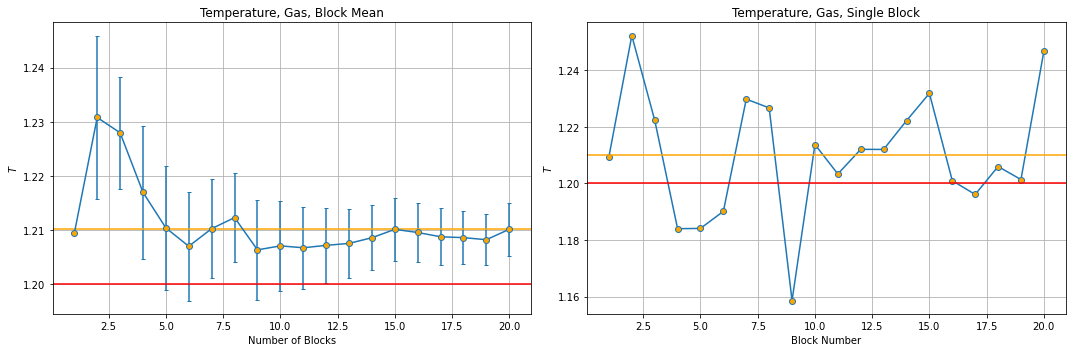

In [4]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("gas/output_temp.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=1.21015, color='orange')
plt.axhline(y=1.2, color='red')

plt.title('Temperature, Gas, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$T$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=1.21015, color='orange')
plt.axhline(y=1.2, color='red')

plt.title('Temperature, Gas, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$T$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Osservazioni

La convergenza è buona: le barre di errore toccano per i tre quarti delle volte la linea del valore finale per gli stati soldo e liquido, mentre per lo stato gassoso questo avviene nove volte su dieci. I sei grafici della temperatura sono **identici** ai sei grafici per l'energia cinetica: cambiano i valori e le unità di misura, ma la forma è identica. Questo è corretto, perché la relazione che lega queste due quantità fisiche è: 
\begin{equation}
  \frac{K}{N}=\frac{3}{2} k_{B} T.
\end{equation}

Abbiamo posto: $k_{B}=1$: $\frac{K}{N}$ e $T$ sono legate da una costante moltiplicativa. Se approssimiamo i valori di $\frac{K}{N}$ e $T$ alla prima cifra decimale, otteniamo: 
1. Stato solido: $T=0.8$, $\frac{K}{N}=1.2$; $\quad$ 2. Stato liquido: $T=1.1$, $\frac{K}{N}=1.65$; $\quad$ 3. Stato gassoso: $T=1.2$, $\frac{K}{N}=1.8$.

In rosso è rappresentata la linea del valore della temperatura richiesto dal testo dell'esercizio. Con il problema dell'equilibrazione della temperatura, siamo partiti da un valore più alto (stato solido e liquido) e più basso (stato gassoso), selezionato per tentativi. Purtoppo un'approssimazione più accurata del millesimo non è stato possibile farla, inoltre questo valore fluttua. Comunque i valori della temperatura che vengono dalla simulazione non sono inconsistenti.

### <span style="color:blue"> 5. Pressione: $P$. </span> 

### Stato solido

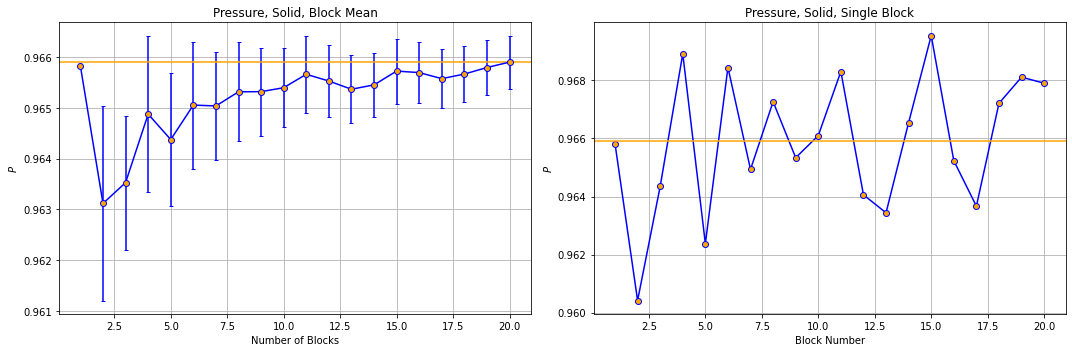

In [4]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("solid/output_pres.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, color='blue', capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=0.965898, color='orange')
#plt.axhline(y=0.88, color='red')

plt.title('Pressure, Solid, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$P$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, color='blue', marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=0.965898, color='orange')
#plt.axhline(y=0.88, color='red')

plt.title('Pressure, Solid, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$P$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Stato liquido

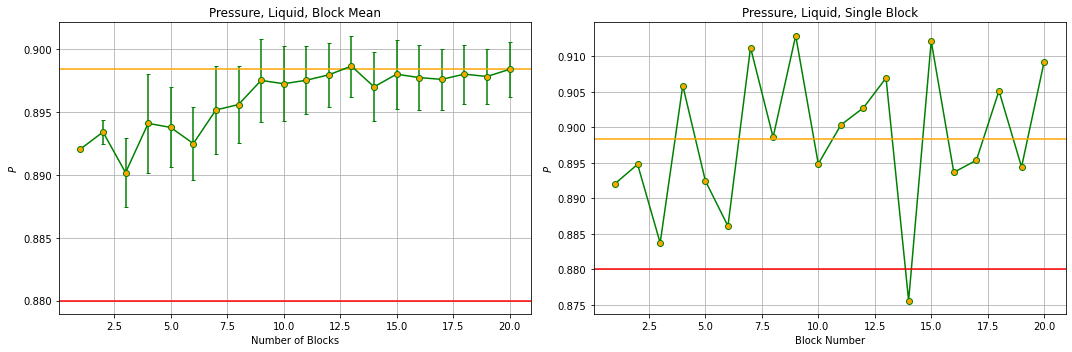

In [7]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("liquid/output_pres.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, color='green', capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=0.898404, color='orange')
plt.axhline(y=0.88, color='red')

plt.title('Pressure, Liquid, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$P$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, color='green', marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=0.898404, color='orange')
plt.axhline(y=0.88, color='red')

plt.title('Pressure, Liquid, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$P$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Stato gassoso

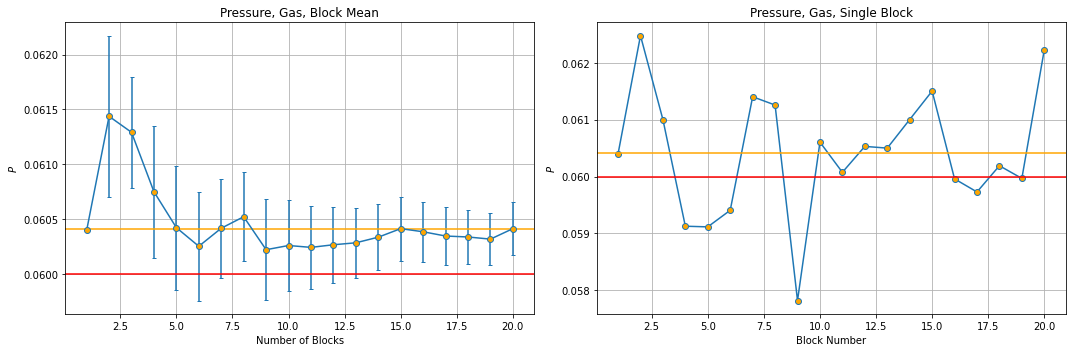

In [8]:
plt.figure(figsize=(15,5))
x, f, y, error = np.loadtxt("gas/output_pres.dat", unpack='true')

plt.subplot(121)
plt.errorbar(x, y, yerr=error, capsize=2, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=0.0604144, color='orange')
plt.axhline(y=0.06, color='red')

plt.title('Pressure, Gas, Block Mean')
plt.xlabel('Number of Blocks')
plt.ylabel('$P$')
plt.grid(True)

plt.subplot(122)
plt.plot(x, f, marker='o', mfc='orange', ms=6, mew=1)
plt.axhline(y=0.0604144, color='orange')
plt.axhline(y=0.06, color='red')

plt.title('Pressure, Gas, Single Block')
plt.xlabel('Block Number')
plt.ylabel('$P$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Osservazioni

La convergenza è buona: le barre di errore toccano per l'$80\%$ delle volte la linea dello stato solido, per il $75\%$ delle volte la linea dello stato liquido, mentre per lo stato gassoso questo avviene per il $90\%$ dei casi. I sei grafici della pressione hanno la stessa forma e sono quasi identici ai sei grafici della temperatura. Questo è corretto perché la relazione che lega queste due quantità fisiche è data da due contributi: la **legge del gas perfetto** e il **teorema del viriale**:

\begin{equation}
P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle
\end{equation}

essendo: $N$ il numero di particelle, $V$ il volume, $\rho$ la densità di particelle e $k_{B}=1$, che sono tutte costanti del problema. Il termine del teorema del viriale è una costante additiva che dipende dal volume e dalla somma di tutte le interazioni di tutte le particelle. La **legge del gas perfetto determina la forma** della curva mentre il **teorema del viriale sposta la curva verso l'alto**. 

Se non ci fosse il contributo del teorema del virale, la pressione sarebbe descritta solo dalla legge del gas perfetto: 

\begin{equation}
  P = \frac{N}{V} k_{B} T = \rho k_{B} T. 
\end{equation}

Se in questa equazione sostituiamo i valori di $\rho$ e di $T$ dell'esercizio, con $k_{B}=1$, otteniamo $P$: 
1. Stato solido: $T=0.8$, $P=0.88$; $\quad$ 2. Stato liquido: $T=1.1$, $P=0.88$; $\quad$ 3. Stato gassoso: $T=1.2$, $P=0.06$.

Se ci fosse stato solo questo contributo, il grafico di $P$ avrebbe sempre avuto la stessa forma dei grafici di $T$ e di $K/N$ perché sono legati da una costante moltiplicativa, ma sarebbe stato più in basso. La riga rossa nei tre grafici di $P$ rappresenta questi tre valori della pressione ideale per i tre stati della materia. Per lo stato solido ho lasciato la riga in un commento perché sarebbe fuori scala rispetto al grafico della media a blocchi. 

Osserviamo che il **contributo del viriale** è dominante per lo stato solido, grande per lo stato liquido e piccolo per lo stato gassoso. Questo indica che: 
1. la legge giusta per descrivere un gas è la legge del gas perfetto;
2. lo stato liquido è una via di mezzo tra stato gassoso e stato solido: i due contributi sono equilibrati;
3. la legge giusta per descrivere lo stato solido è un potenziale a corto range, come il potenziale di Lennard-Jones, oggetto del teorema del viriale.

Il **viriale** dà un contributo **positivo** alla pressione: ne aumenta il valore. Il viriale è dato dalla somma di tutti i potenziali di **Lennard-Jones** che si instaurano tra tutte le possibili **coppie** di particelle del sistema: ci saranno non solo contributi positivi ma anche alcuni negativi e se sommati danno un risultato positivo. Questo perché sono potenziali a **corto range** che si instaurano tra particelle vicine che sono della stessa carica: quindi il potenziale totale è **repulsivo** e aumenta la pressione del sistema. E' maggiore per lo stato solido, dove le particelle sono in media più vicine tra di loro, intermedio per lo stato liquido ed è minore per lo stato gassoso, dove le particelle sono tra di loro in media più lontane e interagiscono reciprocamente di meno.

### Conclusioni

L'obiettivo di questo esperimento era **calcolare**, per i tre stati della materia le seguenti **proprietà fisiche**: $E/N$, $U/N$, $K/N$, $T$ e $P$. Per svolgere questo compito ci è stato donato un codice che calcola le prime quattro proprietà; per calcolare $P$ abbiamo aggiunto noi una modifica al codice. La legge per calcolo di $P$ mette insieme i contributi della legge del **gas perfetto e** del **teorema del viriale**, che sfrutta il potenziale a corto range di Lennard-Jones. Abbiamo svolto la simulazione per l'Argon nelle **unità di misura naturali** del problema. 

Nei grafici osserviamo che la **convergenza** dei valori ottenuti gradualmente con il metodo della **media a blocchi** avviene, per le $15$ misure effettuate, in una percentuale che va dal $67\%$ al $90\%$ dei casi e che i valori misurati riproducono le leggi fisiche che descrivono il problema. Possiamo concludere dicendo che c'è **accordo** tra la teoria e l'esperimento e che quindi l'esperimento è riuscito.